<a href="https://colab.research.google.com/github/tirtharajdash/BITS-G513_MetaLearning/blob/main/Lab_3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook has been adapted from NYU's Deep Learning Course taught by Yann LeCun & Alfredo Canziani. [ Website ](https://atcold.github.io/pytorch-Deep-Learning/)

# Convolutions

## Outline
1. Convolution from Signal Processing
2. 1D Convolution in PyTorch
2. 2D Convolution in PyTorch on Images

$$ (f_1 * f_2)(t) = \int_{-\infty}^{\infty} f_1({\tau})f_2(t-\tau)d\tau $$

In [10]:
import numpy as np
!pip install matplotlib scipy ipywidgets git+git://github.com/mkrphys/ipython-tikzmagic.git
import matplotlib.pyplot as plt
%load_ext tikzmagic

import scipy.integrate
from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['animation.writer'] = 'avconv'

  Cloning git://github.com/mkrphys/ipython-tikzmagic.git to /tmp/pip-req-build-mpfapfa4
  Running command git clone -q git://github.com/mkrphys/ipython-tikzmagic.git /tmp/pip-req-build-mpfapfa4
  Created wheel for ipython-tikzmagic: filename=ipython_tikzmagic-0.1.1-cp36-none-any.whl size=6224 sha256=dcfb19ef3b86dfc2a09ebf263355f0595dca0021123c770ac9a97282904a5cea
  Stored in directory: /tmp/pip-ephem-wheel-cache-9fgvu04d/wheels/0b/5d/55/ab467cf2f7483b8e5d926491c0df452011ce1567d418ad9910
Successfully built ipython-tikzmagic


In [11]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

In [12]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

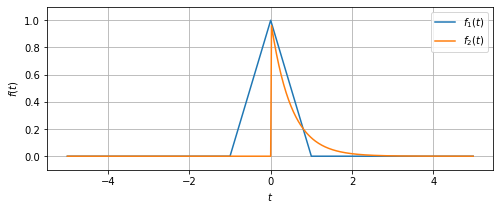

In [13]:
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

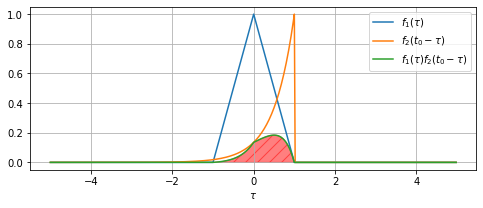

In [14]:
t0 = 1
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(8,3))
plt.gca().set_ymargin(0.05);
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$')
plt.fill(t, product(t), color='r', alpha=0.5, hatch='//')
plt.grid(True); plt.xlabel(r'$\tau$'); plt.legend(fontsize=10);

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): $(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(product(t), t))))

In [15]:
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear()
    
    plt.subplot(211)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$')
    plt.legend(fontsize=10)
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white'))
    
    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$(f_1*f_2)(t)$')
    plt.legend(fontsize=10)
    #plt.show()

In [16]:
plt.figure()
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

<Figure size 576x432 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

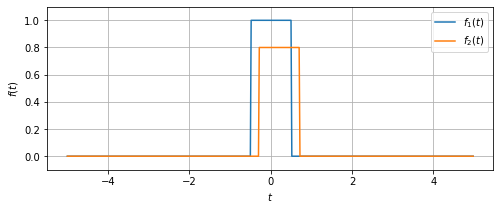

In [17]:
f1 = lambda t: (abs(t)<0.5).astype(float)
f2 = lambda t: 0.8*(abs(t-0.2)<0.5).astype(float)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

In [18]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

**Convolutions in PyTorch**

In [37]:
import torch
import torch.nn as nn

input = torch.tensor([1, 0, 1, 0, 1, 0, 1], dtype = torch.float).reshape(1,1,-1)

convolve1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1)
convolve2 = nn.Conv1d(in_channels=1, out_channels=5, kernel_size=3, stride=1)


In [38]:
convolve1(input)

tensor([[[-0.2612,  0.2870, -0.2612,  0.2870, -0.2612]]],
       grad_fn=<SqueezeBackward1>)

<p align="center">
<img src="https://peltarion.com/static/1d_convolution_pa1.png">
</p>

In [44]:
with torch.no_grad():
    convolve1.weight = nn.Parameter(torch.ones_like(convolve1.weight))
    convolve1.bias = nn.Parameter(torch.zeros_like(convolve1.bias))

In [47]:
print(convolve1.weight, convolve1.bias)

Parameter containing:
tensor([[[1., 1., 1.]]], requires_grad=True) Parameter containing:
tensor([0.], requires_grad=True)


In [48]:
convolve1(input)

tensor([[[2., 1., 2., 1., 2.]]], grad_fn=<SqueezeBackward1>)

In [49]:
convolve2(input)

tensor([[[-0.0606, -0.4497, -0.0606, -0.4497, -0.0606],
         [-0.5186, -0.4321, -0.5186, -0.4321, -0.5186],
         [-0.6657,  0.0750, -0.6657,  0.0750, -0.6657],
         [ 0.1146, -0.9494,  0.1146, -0.9494,  0.1146],
         [ 0.1659, -0.8170,  0.1659, -0.8170,  0.1659]]],
       grad_fn=<SqueezeBackward1>)